 <b><h2><center>Pima Indians Diabetes Case Study</center></h2></b>

# Context
Diabetes poses a significant health challenge on a global scale, with its prevalence escalating at a rapid pace.

The Pima Indians Diabetes datasett is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## **Data Description:**
he Diabetes Dataset involves predicting the onset of diabetes within 5 years in given medical details.
It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 768 observations with 8 input variables and 1 output variable. The variable names are as follows:

0. Number of times pregnant.
1. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
2. Diastolic blood pressure (mm Hg).
3. Triceps skinfold thickness (mm).
4. 2-Hour serum insulin (mu U/ml).
5. Body mass index (weight in kg/(height in m)^2).
6. Diabetes pedigree function.
7. Age (years).
8. Class variable (0 or 1).

In [134]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline
pd.set_option("display.float_format", lambda x: "%.2f" % x) #to display values upto 2 decimal places

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [121]:
diab = pd.read_csv("/content/drive/MyDrive/Datasets/pima-indians-diabetes.csv", header=None)

# Data Checking

In [38]:
diab.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [122]:
#rename columns
diab.rename(
    columns={0: 'Pregnancies', 1: 'Glucose', 2:'BloodPressure',
             3:'SkinThickness', 4:'Insulin', 5: 'BMI',
             6: 'Pedigree', 7: 'Age', 8:'Class'},
            inplace=True)

In [123]:
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [124]:
diab.shape

(768, 9)

* We can see that the dataset has 768 rows and 9 columns

In [125]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Class          768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* We can see that all columns are numerical variables.Most of the attributes are integers and that mass and Pedigree are floating point types.

In [126]:
diab.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Class            0
dtype: int64

In [46]:
diab.isnull().values.any()

False

* The results show that no variables contain missing values. however, by looking at the a few rows of data, there are missing observations for some columns that are marked as a zero value.
* we can confrim by the definition of those columns and the domain knowledge that a zero value is invalid for those measures, e.g. a zero for body mass index or blood pressure is invalid.

# Getting the statistical summary for the dataset

In [47]:
diab.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.00,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.00,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.00,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.00,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.00,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.00,31.99,7.88,0.00,27.30,32.00,36.60,67.10
Pedigree,768.00,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.00,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Class,768.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00


* We can see that there are columns that have a minimum value of zero (0). On some columns, a value of zero does not make sense and indicates an invalid or missing value
* As biological parameters like Glucose, BP, Skin thickness,Insulin & BMI cannot have zero values, looks like null values have been coded as zeros

In [58]:
#get a count of the number of missing values for biological variables
 (diab[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']] == 0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

* We can see that Glucose, BloodPressure and BMI have just a few zero values, whereas BloodPressure, SkinThickness show a lot more, nearly half of the rows

In [152]:
diab["Class"].value_counts()

0   0.65
1   0.35
Name: Class, dtype: float64

* there are 768 individuals, showcasing an unequal distribution in the outcome, with 500 classified as healthy and 268 as sick

# **Missing value treatment**

In [59]:
# Before replacing the missing values with NaN, it’s helpful to verify that the columns contain valid numeric data types
diab.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
Pedigree         float64
Age                int64
Class              int64
dtype: object

* We see that all the columns are either int or float

In [127]:
# replacing the zero values with NaN
diab[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']] =\
 diab[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']].replace(0, np.nan)

# count the number of nan values in each column
diab.isnull().sum()

Pregnancies        0
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Pedigree           0
Age                0
Class              0
dtype: int64

* We can see that the columns 1 to 5 have the same number of missing values as zero values identified above. This is a sign that we have marked the identified missing values correctly.

In [71]:
diab.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
0,6,148.00,72.00,35.00,NaN,33.60,0.63,50,1
1,1,85.00,66.00,29.00,NaN,26.60,0.35,31,0
2,8,183.00,64.00,NaN,NaN,23.30,0.67,32,1
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33,1
5,5,116.00,74.00,NaN,NaN,25.60,0.20,30,0
6,3,78.00,50.00,32.00,88.00,31.00,0.25,26,1
7,10,115.00,NaN,NaN,NaN,35.30,0.13,29,0
8,2,197.00,70.00,45.00,543.00,30.50,0.16,53,1
9,8,125.00,96.00,NaN,NaN,NaN,0.23,54,1


## Remove Rows With Missing Values
The simplest approach for dealing with missing values is to remove entire predictor(s) and/or sample(s) that contain missing values

In [72]:
#drop rows with missing values
diab.dropna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33,1
6,3,78.00,50.00,32.00,88.00,31.00,0.25,26,1
8,2,197.00,70.00,45.00,543.00,30.50,0.16,53,1
13,1,189.00,60.00,23.00,846.00,30.10,0.40,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181.00,88.00,44.00,510.00,43.30,0.22,26,1
755,1,128.00,88.00,39.00,110.00,36.50,1.06,37,1
760,2,88.00,58.00,26.00,16.00,28.40,0.77,22,0
763,10,101.00,76.00,48.00,180.00,32.90,0.17,63,0


* 376 rows was removed.

## Impute Missing Values

In [136]:
# fill missing values with mean column values
diab = diab.fillna(value = diab.mean())

# count the number of NaN values in each column
diab.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Class            0
dtype: int64

* we can see zero missing values.

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Class            0
dtype: int64

In [91]:
from sklearn.impute import SimpleImputer
#the SimpleImputer class to replace missing values with the mean of each column
# then prints the number of NaN values in the transformed matrix
#The SimpleImputer class operates directly on the NumPy array instead of the DataFrame.

# retrieve the numpy array
values = diab.values
# define the imputer
imputer = SimpleImputer(missing_values= np.nan, strategy="mean")
# transform the dataset
transformed_values = imputer.fit_transform(values)
# count the number of NaN values in each column
print(f'Missing: {np.isnan(transformed_values).sum()}')

Missing: 0


## Impute Missing Values with KNN Imputer

KNN or K nearest neighbor imputation is yet another technique to handle missing values.For a data point with missing values, this technique identifies the K closest points under a chosen distance metric (Euclidean by default).

In [100]:
from sklearn.impute import KNNImputer
#The missing value is the mean of the values of that feature for the K nearest neighbors, weighted uniformly by default

## retrieve the numpy array
values = diab.values
# define the imputer
imputer = KNNImputer(n_neighbors= 4)
# transform the dataset
transformed_values = imputer.fit_transform(values)
# count the number of NaN values in each column
np.isnan(transformed_values).sum()

0

## Impute Missing Values with Iterative Imputer

The IterativeImputer predicts the missing values of a feature by modeling it as a function of other features. The imputer, therefore, predicts the missing values of a feature using the other features as predictors.

It then imputes all missing features in a round-robin fashion. This imputation continues iteratively for max_iter number of times, and is set to 10 by default.

In [117]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# retrieve the numpy array
values = diab.values
# define the imputer
imputer = IterativeImputer(random_state= 0)
# transform the dataset
transformed_values = imputer.fit_transform(values)
# count the number of NaN values in each column
np.isnan(transformed_values).sum()

0

In [107]:
pd.DataFrame(values, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Class'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
0,6.00,148.00,72.00,35.00,155.55,33.60,0.63,50.00,1.00
1,1.00,85.00,66.00,29.00,155.55,26.60,0.35,31.00,0.00
2,8.00,183.00,64.00,29.15,155.55,23.30,0.67,32.00,1.00
3,1.00,89.00,66.00,23.00,94.00,28.10,0.17,21.00,0.00
4,0.00,137.00,40.00,35.00,168.00,43.10,2.29,33.00,1.00
...,...,...,...,...,...,...,...,...,...
763,10.00,101.00,76.00,48.00,180.00,32.90,0.17,63.00,0.00
764,2.00,122.00,70.00,27.00,155.55,36.80,0.34,27.00,0.00
765,5.00,121.00,72.00,23.00,112.00,26.20,0.24,30.00,0.00
766,1.00,126.00,60.00,29.15,155.55,30.10,0.35,47.00,1.00


## Encoding Missingness with MissingIndicator

a MissingIndicator class to create binary indicators for missing values in datasets.

Marking missing values with indicators is helpful in the following:

* Understanding missingness patterns in data.
* Guiding imputation strategies for different features.
* Creating a new feature that indicates the presence or absence of values for a particular feature.

In [128]:
#how to use the MissingIndicator to mark missing values and obtain a binary indicator matrix. The features parameter is set to “missing-only” by default to include only the feature columns with missing values.
from sklearn.impute import MissingIndicator
# retrieve the numpy array
values = diab.values
# instantiate the indicator
indicator = MissingIndicator(features="missing-only", error_on_new=True)
# transform the dataset
indicators = indicator.fit_transform(values)
# count the number of NaN values in each column
print(f'Missing Indicators: \n{indicators}')

Missing Indicators: 
[[False False False  True False]
 [False False False  True False]
 [False False  True  True False]
 ...
 [False False False False False]
 [False False  True  True False]
 [False False False  True False]]



# Univariate Plots

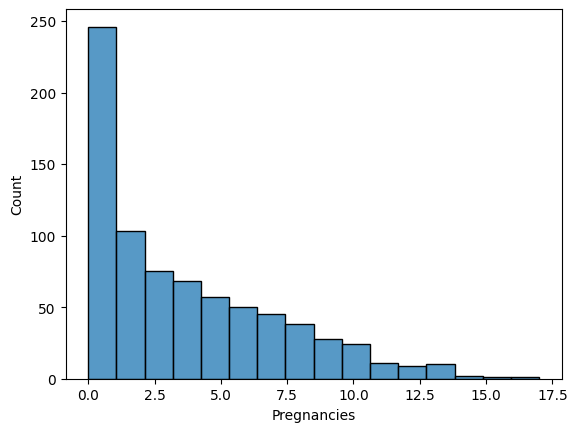

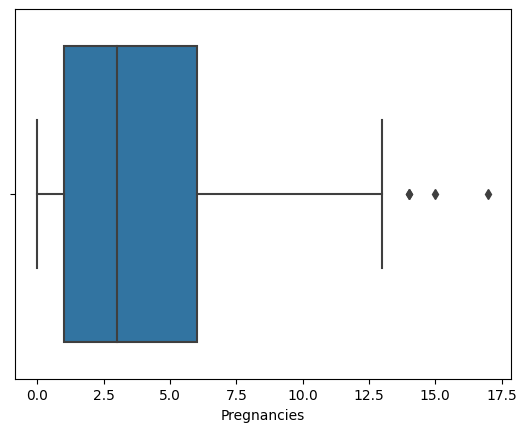

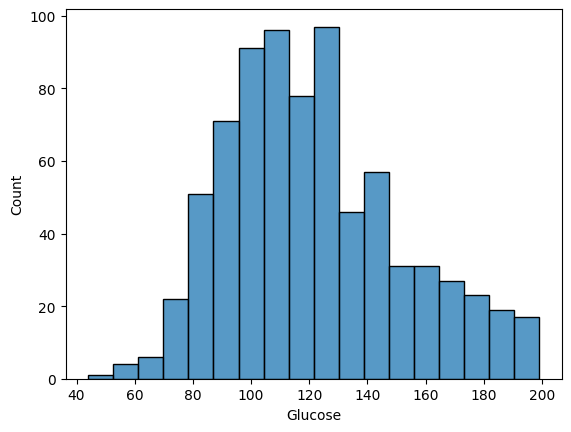

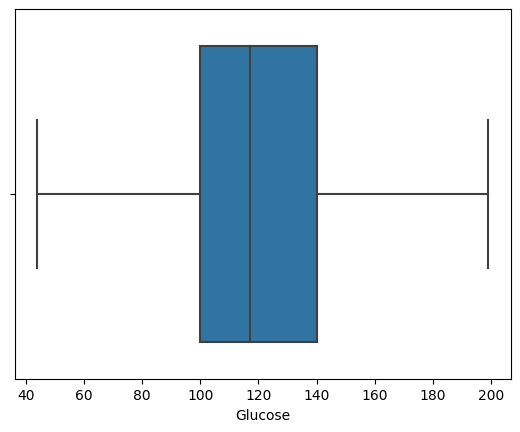

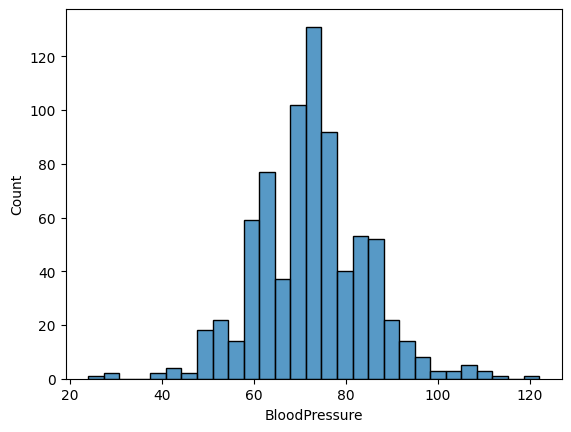

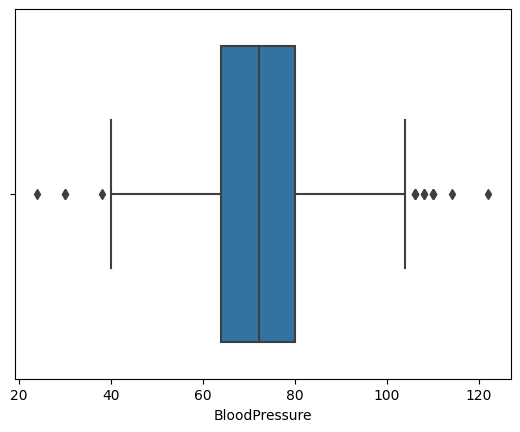

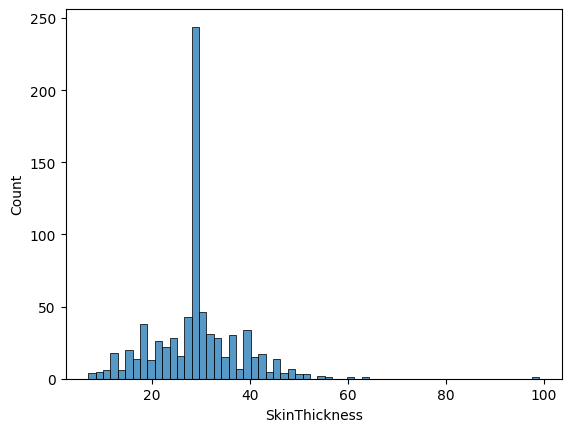

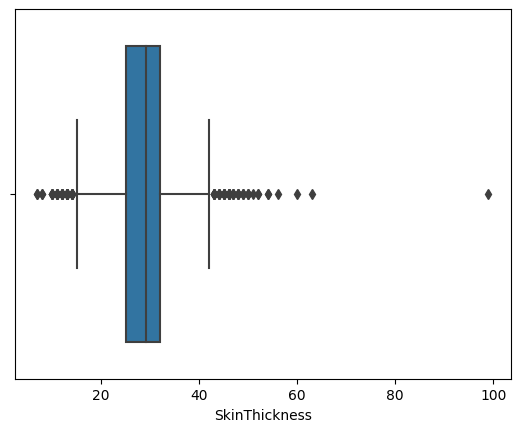

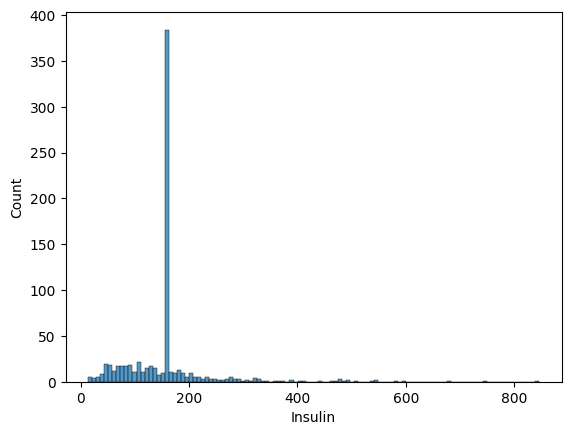

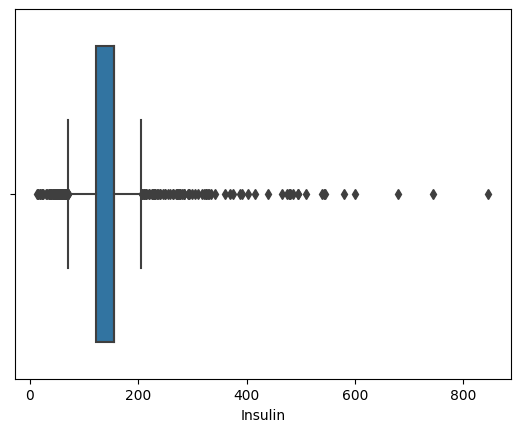

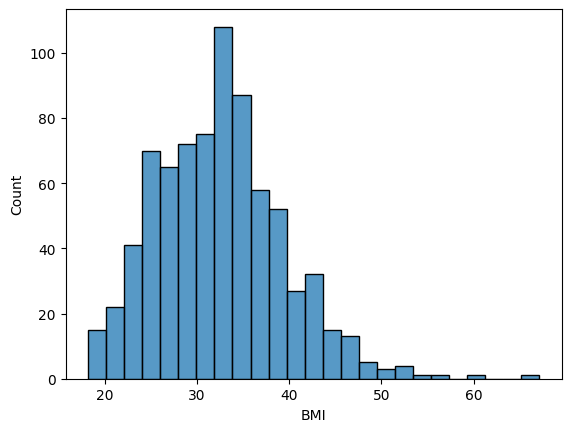

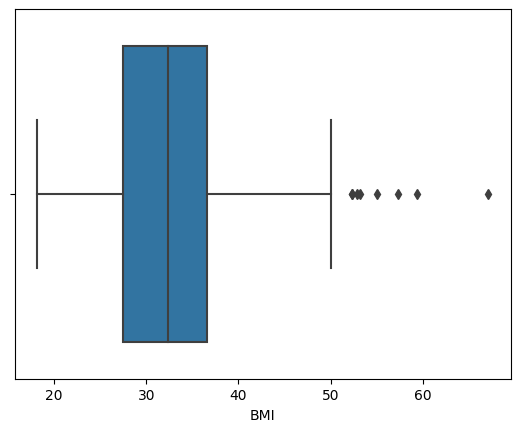

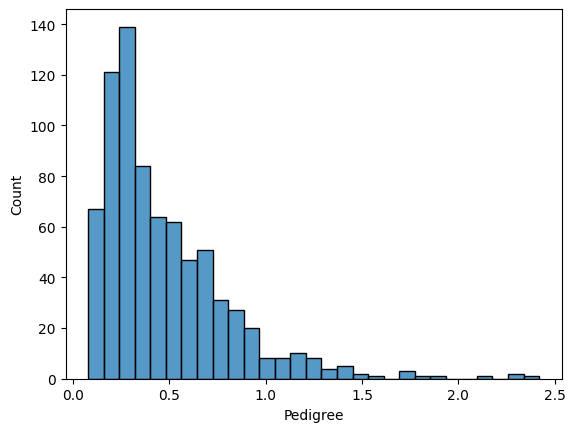

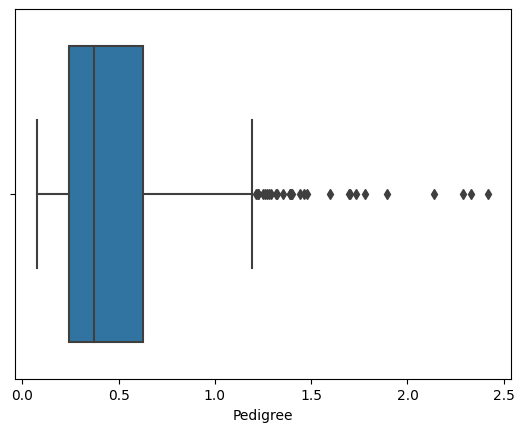

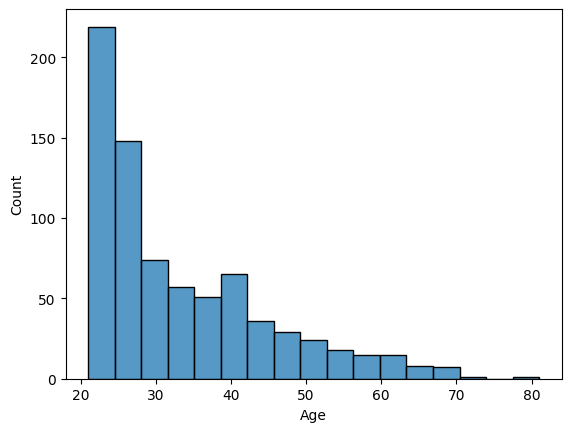

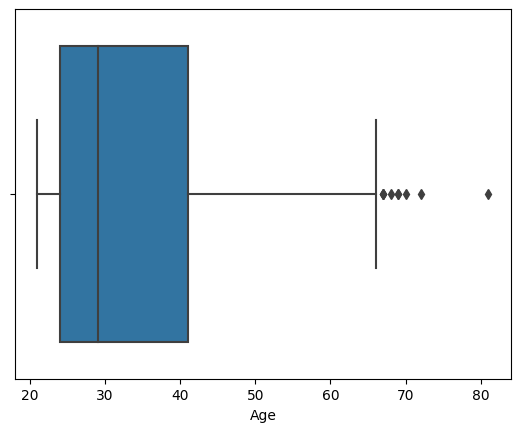

In [142]:
num_vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age']
for var in num_vars:
  sns.histplot(data = diab, x= var)
  plt.show()
  sns.boxplot(data = diab, x= var)
  plt.show()

* Visually, Pregnancies distribution is right skewed. A large proportion of the participants are zero count on pregnancy. there are some wemen with more than 12 Pregnancies which indicates of beig outliers.
*Histogram of Glucose data is slightly skewed to right.without any outliers.
* Distribution of blood presure looks normal. Mean value is 69. there are few outliers at both tails.
* Skin thickness seems be be skewed a bit to the right and with lots of outliers at both sides.
* 2hour serum insulin is expected to be between 16 to 166. Clearly there are Outliers in the data.
* BMI distributaion is right skewed. There are few outliers. Few are obese in the dataset.
* Diabetes Pedigree Function dis hilghy right skewed with alot of outliers.
* Age is skewed. most wemon are btween 20 and 30 years old. and  afew are above 70 years indicating of outliers.


# Bivariate Analysis

<Axes: >

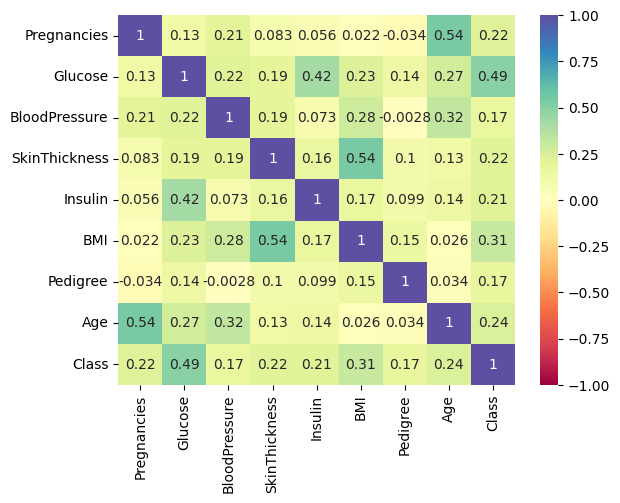

In [143]:
sns.heatmap(data = diab.corr(), vmin = -1, vmax = 1, annot= True, cmap ="Spectral")

* There appears to be a moderate correlation of about 0.5 between Glucose levels and the likelihood of developing diabetes.
* Glucose and Insulin show a correlation of 0.42.
* There is an increase in the number of pregnancies with advancing age

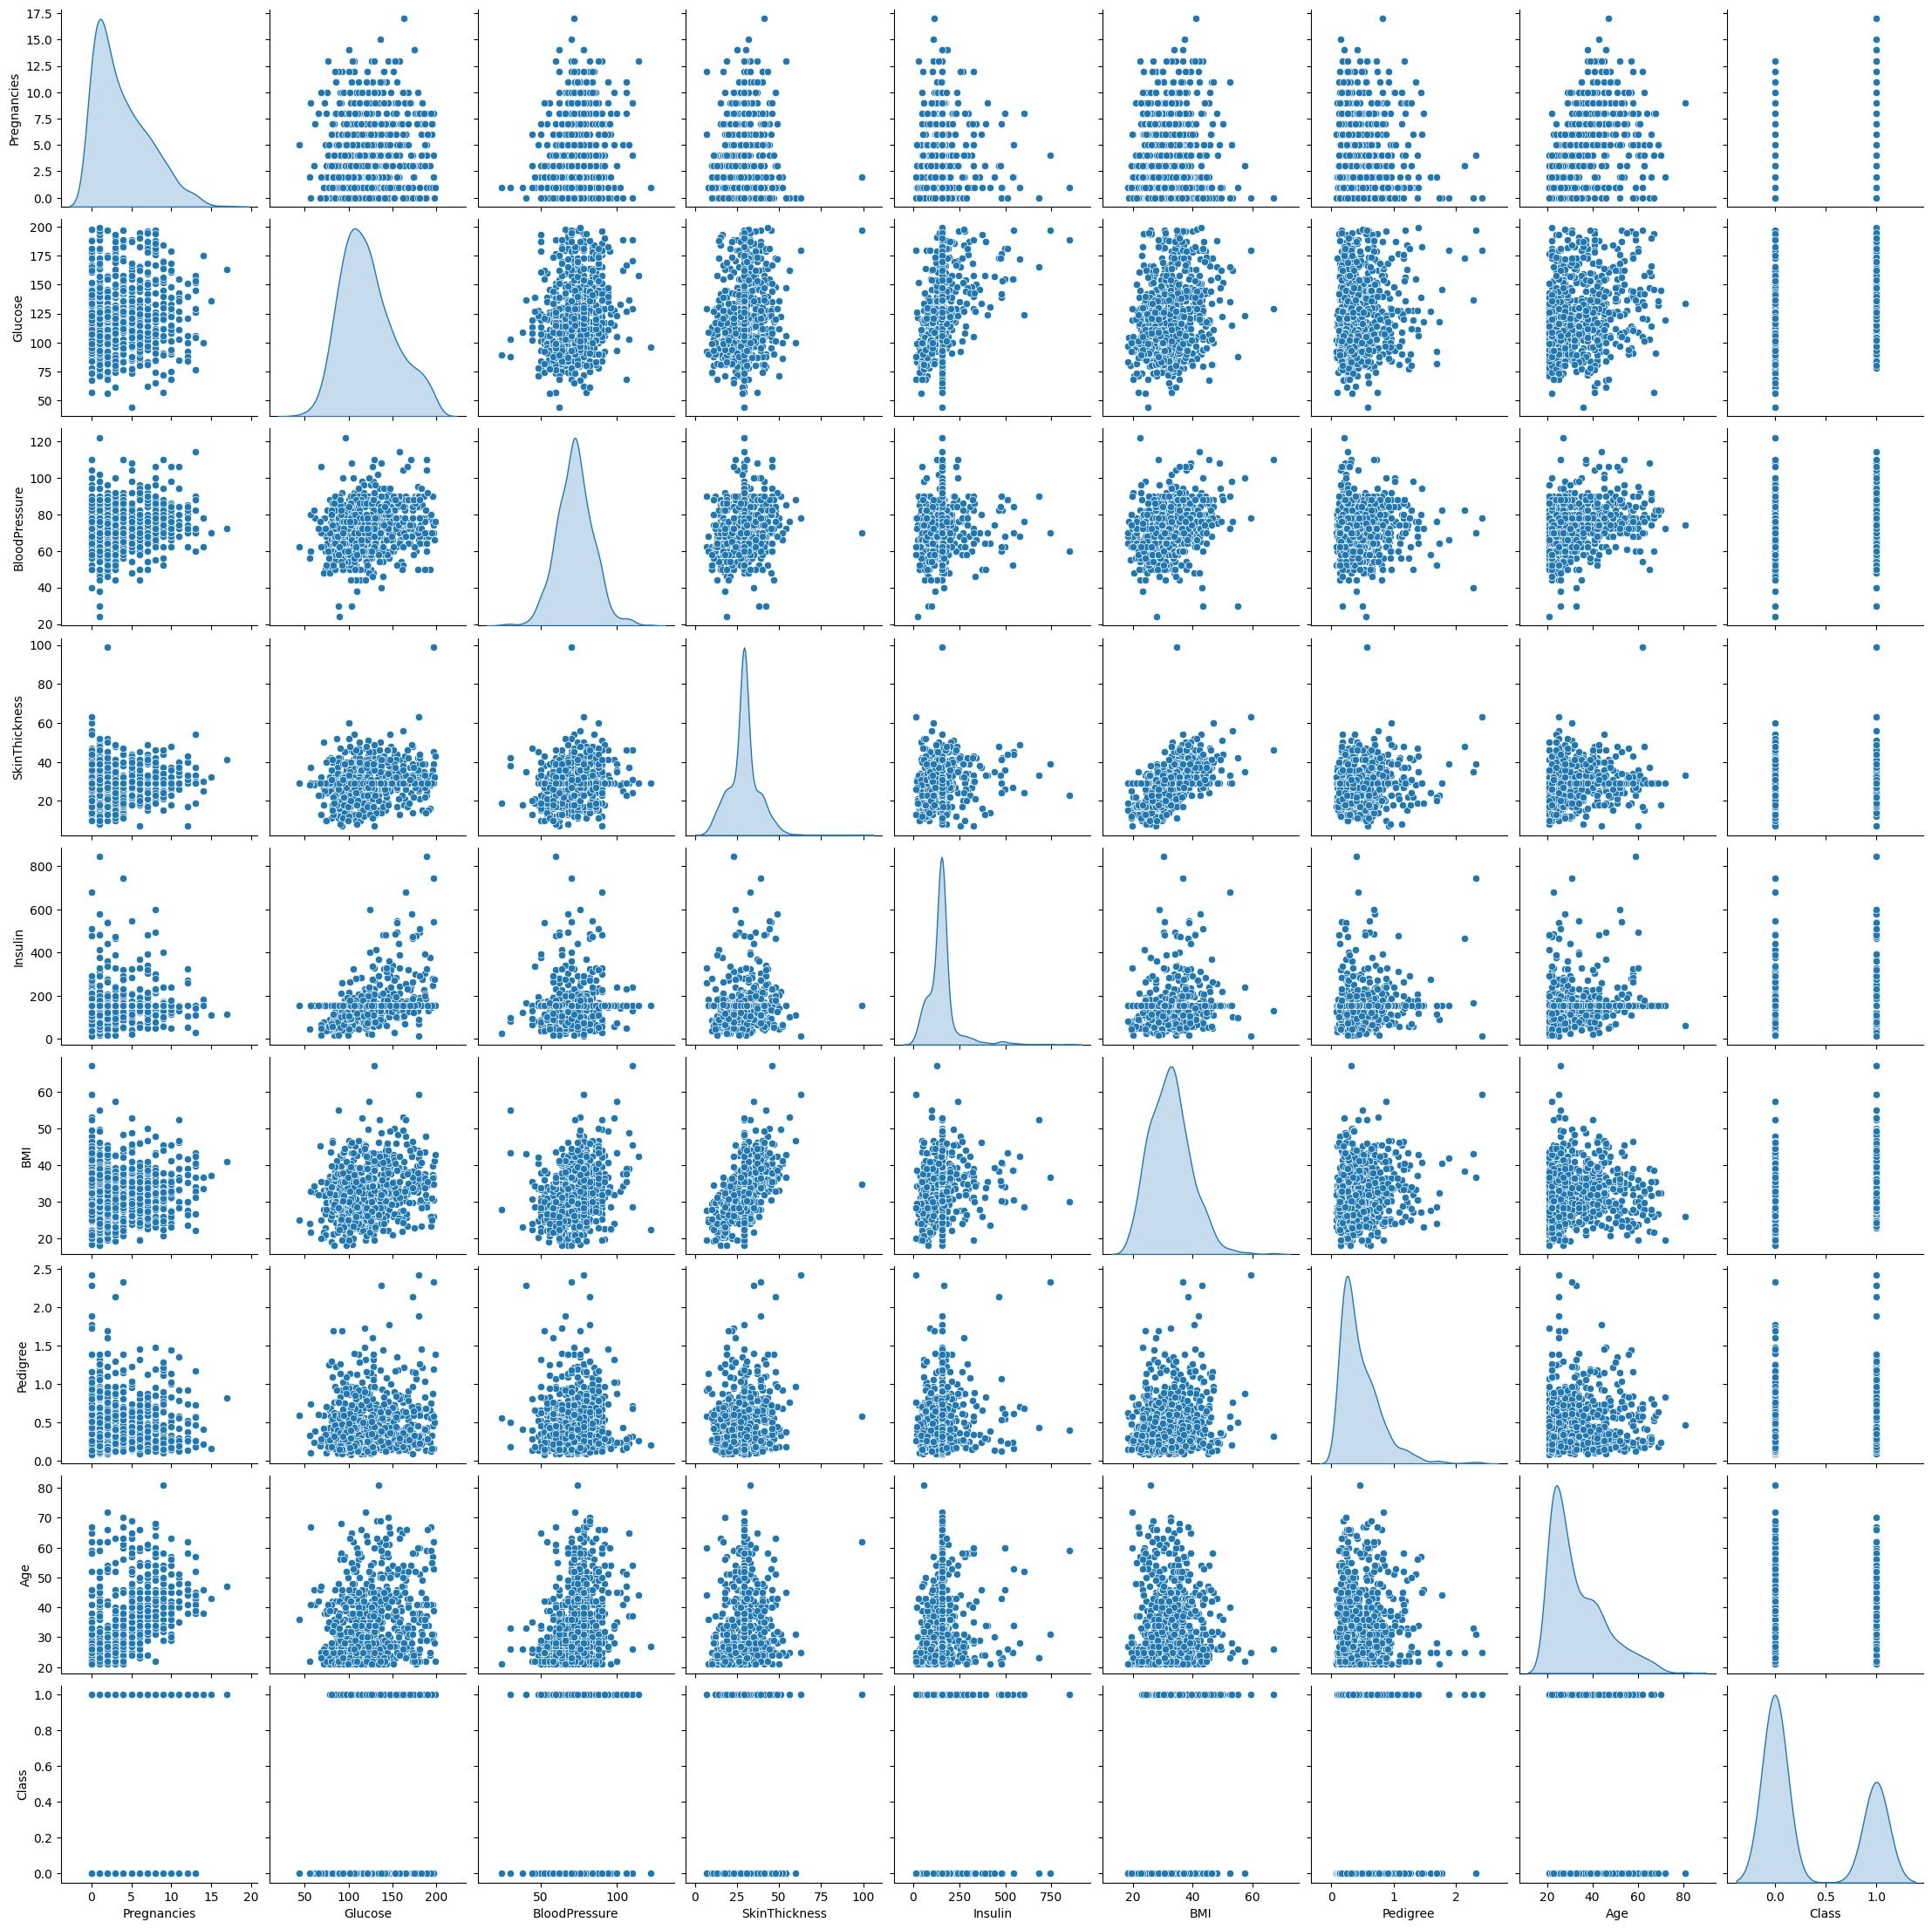

In [144]:
sns.pairplot(data= diab, diag_kind="kde")
plt.show();

* From scatter plots,  only BMI & SkinThickness and Pregnancies & Age seem to have positive linear relationships.
* There are no non-linear relationships between the presence of diabetes and biological parameters.

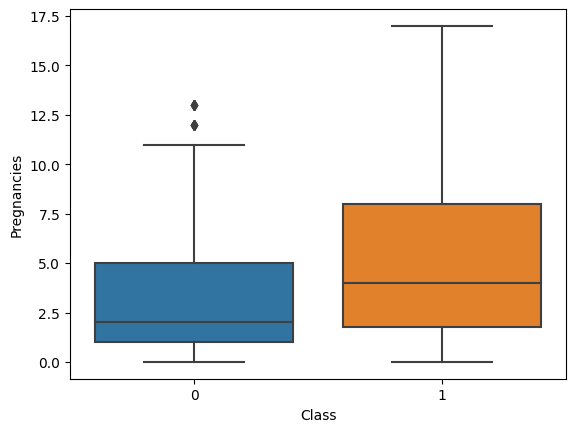

In [145]:
sns.boxplot(data = diab , x ="Class", y= "Pregnancies")
plt.show()

* The median number of pregnancies appears higher among diabetic women

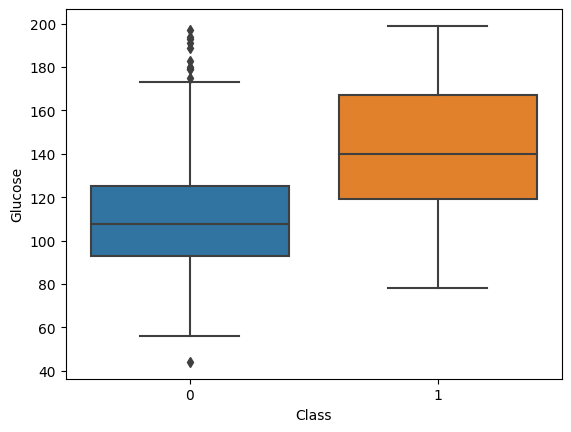

In [146]:
sns.boxplot(data = diab , x ="Class", y= "Glucose")
plt.show()

* Clearly diabetic group has higher glucose than non-diabetic

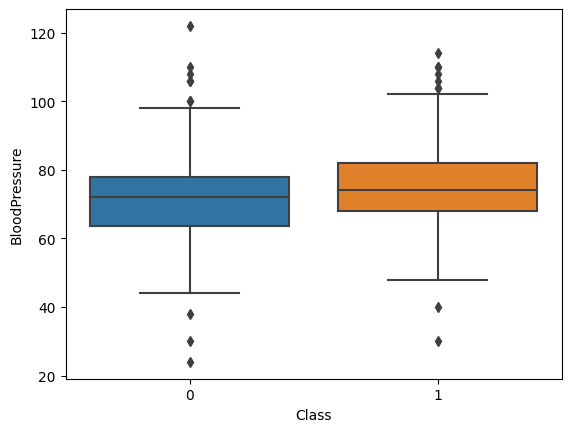

In [147]:
sns.boxplot(data = diab , x ="Class", y= "BloodPressure")
plt.show()

* The difference in blood pressure between diabetic and non-diabetic groups is not significan.

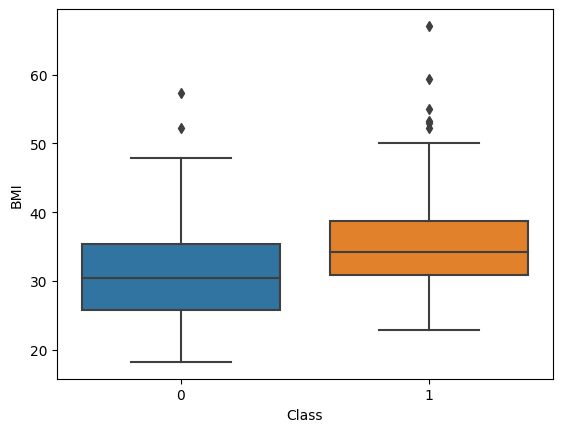

In [149]:
sns.boxplot(data = diab , x ="Class", y= "BMI")
plt.show()

* Diabetic people seems to be only higher side of BMI.

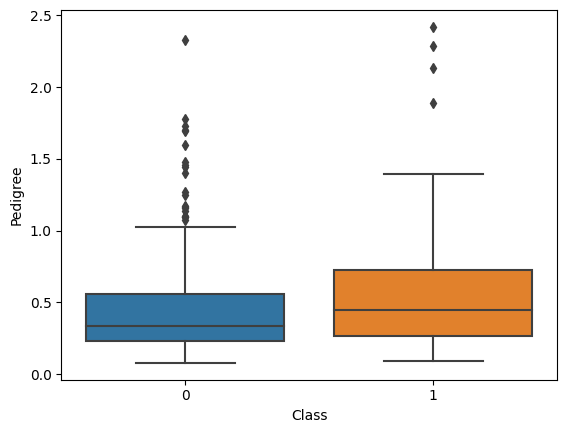

In [150]:
sns.boxplot(data = diab , x ="Class", y= "Pedigree")
plt.show()

* As DPF increases, there seems to be a likelihood of being diabetic

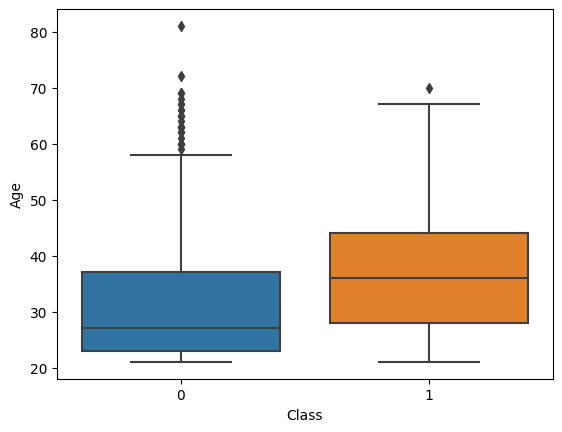

In [151]:
sns.boxplot(data = diab , x ="Class", y= "Age")
plt.show()

* There is a tendency that as people age, they are likely to become diabetic

# Conculation
* Data set contains many zero values and they have been imputed by mean of each column.
* Nearly 65% of participants are diabetic in the sample data
* our visulatization analysis shows that few factors seem to influence the outcome
* Moderate correlation exists between few factors.